### Summary of the problem statement
Pneumonia is in the list of top 10 causes for death in the US. It accounts for 15% of all death in children under the age of 5 internationally. Accurately diagnosing Pneumonia is an elaborate process. It requires review of Chest Radiograph by trained specialists and other detailed examination. Due to the high volume of Chest X-Ray review the specialists are burdened with, screening the radiographs for opacity which indicated pneumonia using AI to prioritize and expedite review is seen a possible solution.

### The Dataset - BIG DATA
The dataset contains images with details in DICOM® format. DICOM® (Digital Imaging and Communications in Medicine) is the international standard to transmit, store, retrieve, print, process, and display medical imaging information. DICOM images are special images with metadata. Each image has information about itself.

The actual data set that has 26684 training and 3000 test X-ray images. The images are annotated with bounding boxes to highlight the region in the X-ray that is indicative of possible Pneumonia. 

### The normal structured data
All the patient outcomes and the infected area are stored in the CSV File Patient_details.csv. This also contains 100 records which pertain to each of the patients whose image details are in the zip file. 


In [1]:
!pip install pydicom

In [2]:
# This will install a special package to read dicom files

import pandas as pd
import matplotlib.pyplot as plt 
import pydicom
import numpy as np

In [4]:
patient_df= pd.read_csv("Patient_Details_opt.csv")

In [5]:
patient_df.head()

,patientId,x,y,width,height,Target,class
0,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
1,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
2,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
3,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
4,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1,Lung Opacity


In [6]:
# Storing PatientIds as list because they are the  file name of DCIM images, hence it will help to read the images 
patientID = patient_df.patientId.unique().tolist()

In [7]:
path='.\\stage_2_train_images\\'

In [8]:
# Print dcm files from the directory
import glob
print(glob.glob(".\\stage_2_train_images\\*.dcm"))

['.\\stage_2_train_images\\00436515-870c-4b36-a041-de91049b9ab4.dcm', '.\\stage_2_train_images\\00704310-78a8-4b38-8475-49f4573b2dbb.dcm', '.\\stage_2_train_images\\00aecb01-a116-45a2-956c-08d2fa55433f.dcm', '.\\stage_2_train_images\\00c0b293-48e7-4e16-ac76-9269ba535a62.dcm', '.\\stage_2_train_images\\00f08de1-517e-4652-a04f-d1dc9ee48593.dcm', '.\\stage_2_train_images\\0100515c-5204-4f31-98e0-f35e4b00004a.dcm', '.\\stage_2_train_images\\010ccb9f-6d46-4380-af11-84f87397a1b8.dcm', '.\\stage_2_train_images\\012a5620-d082-4bb8-9b3b-e72d8938000c.dcm', '.\\stage_2_train_images\\0174c4bb-28f5-41e3-a13f-a396badc18bd.dcm', '.\\stage_2_train_images\\019d950b-dd38-4cf3-a686-527a75728be6.dcm']


In [9]:
# Read all the files from directory 
image_list = glob.glob(".\\stage_2_train_images\\*.dcm")


In [10]:
#Read all the dicom files into an array
dcm_data=[]
for images in image_list:
    dcm_data.append(pydicom.read_file(images))    

In [11]:
#We will examine one random dicom image. The image is stored as an attribute array
random_dicom = dcm_data[np.random.randint(0,10)]
print(type(random_dicom))

<class 'pydicom.dataset.FileDataset'>


As we can see, each dicom file is read as a **FileDataSet**. All kind of Big Data have ways to deal with them. For dicom images, it is **FileDataSet** which contains the image and metadata. We only retrieve the image attribute, which is stored as a ndarray named **pixel_array**. 

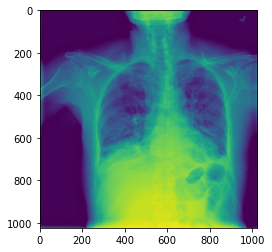

In [12]:
plt.imshow(random_dicom.pixel_array)